In [1]:
%matplotlib inline
from pylab import *
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import math
from libtiff import TIFF
import seaborn as sn
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing,tree,svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error,explained_variance_score
from sklearn import datasets, linear_model
from sklearn.feature_selection import VarianceThreshold,RFE
import joblib 

In [2]:
img=cv2.imread('test.tiff',cv2.IMREAD_UNCHANGED)


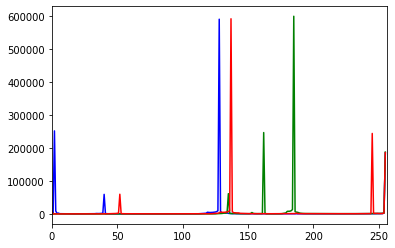

267210.5
267210.5


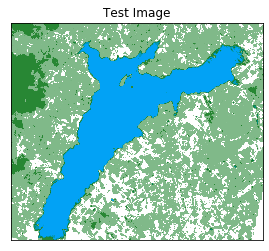

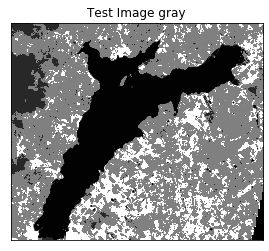

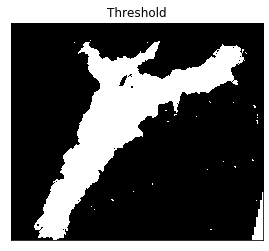

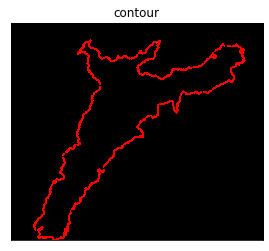

[7621.0, 440.0, 251880.0, 8905.0, 1837.0, 2456.0, 726.0, 649.0, 304.0, 275.0, 233.0, 185.0, 208.0, 197.0, 185.0, 174.0, 174.0, 154.0, 183.0, 177.0, 166.0, 166.0, 188.0, 203.0, 206.0, 209.0, 230.0, 229.0, 286.0, 312.0, 368.0, 445.0, 651.0, 746.0, 1260.0, 1114.0, 1104.0, 1344.0, 1555.0, 1928.0, 59349.0, 926.0, 713.0, 527.0, 399.0, 314.0, 290.0, 284.0, 272.0, 269.0, 241.0, 235.0, 251.0, 221.0, 238.0, 217.0, 229.0, 212.0, 224.0, 199.0, 184.0, 206.0, 174.0, 195.0, 197.0, 177.0, 195.0, 205.0, 166.0, 171.0, 158.0, 176.0, 164.0, 187.0, 162.0, 174.0, 174.0, 176.0, 183.0, 164.0, 173.0, 177.0, 185.0, 156.0, 160.0, 165.0, 173.0, 172.0, 156.0, 185.0, 181.0, 146.0, 180.0, 176.0, 216.0, 180.0, 185.0, 230.0, 227.0, 233.0, 201.0, 207.0, 189.0, 204.0, 213.0, 206.0, 226.0, 241.0, 243.0, 263.0, 379.0, 367.0, 479.0, 836.0, 946.0, 1054.0, 1456.0, 1625.0, 2018.0, 5128.0, 4528.0, 4276.0, 4392.0, 4667.0, 5094.0, 5726.0, 6914.0, 9578.0, 590694.0, 7286.0, 3603.0, 3106.0, 2969.0, 2652.0, 2865.0, 1707.0, 1338.0, 1

In [3]:
file='/home/caasalazarsa/Documentos/PRUEBAS_TESIS/CAP3_PRIMER AGENTE/23junio2017/S2A_tile_20170623_18NXM_0_(B03-B08)_(B03+B08)_M_[-73.22078704833986,5.5807922489019255,-73.16559791564943,5.628200566956353].tiff'

def describe(file_name,show=False,save=False,save_name=''):

    # to open a tiff file for reading:
    tif = TIFF.open(file_name, mode='r')
    # to read all images in a TIFF file:
    for image in tif.iter_images(): # do stuff with image
    
        imggray=image[:,:,0]
        color = ('b','g','r')
        features=[]
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            features=features+(histr[:,0].tolist())
            if show:
                plt.plot(histr,color = col)
                plt.xlim([0,256])
        if show:
            plt.show()
        ret2,th2 = cv2.threshold(imggray,20,255,cv2.THRESH_BINARY_INV)
        #ret2,th2 = cv2.threshold(image[:,:,0],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


        #cv2.imwrite('Input.jpg',image)
        #cv2.imwrite('Gray.jpg',imggray)
        #cv2.imwrite('BinaryImage.jpg',th2)
    
        contours,hierarchy = cv2.findContours(th2,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        #print(len(contours))
        contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
        biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
        areabig=cv2.contourArea(biggest_contour)
        M = cv2.moments(biggest_contour)
        print (M['m00'])

        print(areabig)
        result=areabig*25
        #print(result)
        resultkm2=result/1000000
        #print(resultkm2)
        features=features+[resultkm2]
        features=features+(list(M.values()))
        image_external = np.zeros(image.shape, image.dtype)
        cv2.drawContours(image_external,  biggest_contour, -1, (0,0,255), 10)
        if show:
            plt.imshow(image)
            plt.title('Test Image'), plt.xticks([]), plt.yticks([])
            plt.show()    
            plt.imshow(imggray, cmap='gray')
            plt.title('Test Image gray'), plt.xticks([]), plt.yticks([])
            plt.show()
            plt.imshow(th2, cmap='gray')
            plt.title('Threshold'), plt.xticks([]), plt.yticks([])
            plt.show()
            plt.imshow(cv2.cvtColor(image_external, cv2.COLOR_BGR2RGB))
            plt.title('contour'), plt.xticks([]), plt.yticks([])
            plt.show()
            
        if save:
            cv2.imwrite('OUTPUT_SN/'+save_name+'Gray.jpg',imggray)
            cv2.imwrite('OUTPUT_BN/'+save_name+'Th2.jpg',th2)
            cv2.imwrite('OUTPUT_CN/'+save_name+'Contours.jpg',image_external)
            
        return features
        
        

features=describe(file,True)
print(features,size(features))

In [4]:
import os
import datetime
sourcedir = 'INPUT'

dl = os.listdir(sourcedir)

#print(dl)
data=[]
dates=[]


for file in dl:
    
    data.append(describe(sourcedir+'/'+file,save=True,save_name=file))
    result=file.split('_')
    #print(result)
    date=''
    if result[0]=='LC08':
        date1=datetime.datetime.strptime(result[3], '%Y%m%d').strftime('%Y-%m-%d')
        
    else:
        date1=datetime.datetime.strptime(result[2], '%Y%m%d').strftime('%Y-%m-%d')
    dates.append(date1)

print(dates)
dates.sort()
print(dates)

136434.0
136434.0
143947.0
143947.0
161090.0
161090.0
129588.5
129588.5
129588.5
129588.5
38878.0
38878.0
151486.0
151486.0
199767.0
199767.0
201862.5
201862.5
189492.5
189492.5
267210.5
267210.5
200258.5
200258.5
204691.5
204691.5
192700.5
192700.5
138933.0
138933.0
192583.0
192583.0
237365.0
237365.0
149038.0
149038.0
142587.5
142587.5
232541.5
232541.5
175267.5
175267.5
185577.5
185577.5
125597.0
125597.0
188323.0
188323.0
161895.0
161895.0
167624.5
167624.5
139218.0
139218.0
213425.5
213425.5
134813.0
134813.0
202778.0
202778.0
139022.0
139022.0
186144.5
186144.5
131021.5
131021.5
120102.0
120102.0
136277.5
136277.5
201774.5
201774.5
165359.0
165359.0
218792.5
218792.5
151974.0
151974.0
75518.5
75518.5
154803.0
154803.0
141344.5
141344.5
164454.5
164454.5
156298.0
156298.0
193760.0
193760.0
185358.0
185358.0
['2016-02-01', '2020-02-25', '2020-02-05', '2020-03-11', '2020-03-11', '2019-05-01', '2016-01-16', '2017-12-20', '2019-07-25', '2019-12-27', '2017-06-23', '2019-09-28', '2017-1

In [5]:
import datetime
import pandas as pd
#xlrd library requirement

def check_values(fecha):

    sourcedir = 'datos'
    fecha_split=fecha.split('-')
    year=fecha_split[0]
    month=fecha_split[1]
    day=fecha_split[2]
    
    fecha_dict={'01':'Enero','02':'Febrero','03':'Marzo','04':'Abril','05':'Mayo','06':'Junio','07':'Julio','08':'Agosto','09':'Septiembre','10':'Oct','11':'Nov','12':'Dic'}

    dl = os.listdir(sourcedir)

    for file in dl:
        if year in file and '.~' not in file:
            xls = pd.ExcelFile(sourcedir+'/'+file)
            sheet=xls.parse(fecha_dict[month],header=3)
            print(file,month)
            for i in range(len(sheet['FECHA'])):
                if fecha in str(sheet['FECHA'][i]):
                    #print('encontrado')
                    #print(sheet['NIVEL COTA m.s.n.m'][i]) 
                    return sheet['NIVEL COTA m.s.n.m'][i]
    
print("trabajando...")
labels =[]
for date in dates:
    value=check_values(date)
    val=0.0059294968*value**3-47.1177196975*value**2+124804.327219275*value-110192989.648351
    if(val>=98):
        val=98
    labels.append(round(val,5))
print(labels)

#print(data)

    
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
sel = VarianceThreshold(threshold=0.01)
data_scaled_in=list(data_scaled)
sel.fit(data_scaled_in)
data_sav=sel.transform(data_scaled_in)
print(data_sav.shape,data_scaled.shape)

tags=[]
for i in range (len(data_sav[0])):
    tags.append("features "+str(i))

#print(data_scaled[0])

featuresdf = pd.DataFrame(data_sav,columns=tags)
labelsdf=pd.DataFrame(labels,columns=["Label"])
                                    
df = pd.concat([featuresdf, labelsdf], axis=1)
df.to_csv("dataset.csv",index=False)
print("listo")

trabajando...
Niveles diarios de la Copa 2015.xlsx 01
Niveles diarios de la Copa 2015.xlsx 01
Niveles diarios de la Copa 2016.xlsx 01
Niveles diarios de la Copa 2016.xlsx 02
Niveles diarios de la Copa 2016.xlsx 02
Niveles diarios de la Copa 2016.xlsx 03
Niveles diarios de la Copa 2016.xlsx 12
Niveles diarios de la Copa 2017.xlsx 06
Niveles diarios de la Copa 2017.xlsx 08
Niveles diarios de la Copa 2017.xlsx 12
Niveles diarios de la Copa 2017.xlsx 12
Niveles diarios de la Copa 2018.xlsx 01
Niveles diarios de la Copa 2018.xlsx 01
Niveles diarios de la Copa 2018.xlsx 01
Niveles diarios de la Copa 2018.xlsx 01
Niveles diarios de la Copa 2018.xlsx 02
Niveles diarios de la Copa 2018.xlsx 02
Niveles diarios de la Copa 2018.xlsx 03
Niveles diarios de la Copa 2018.xlsx 03
Niveles diarios de la Copa 2018.xlsx 09
Niveles diarios de la Copa 2018.xlsx 10
Niveles diarios de la Copa 2018.xlsx 10
Niveles diarios de la Copa 2018.xlsx 12
Niveles diarios de la Copa 2018.xlsx 12
Niveles diarios de la Copa

In [6]:
rdata=pd.read_csv("dataset.csv")
rdata = rdata.sort_values('Label')

'''Your code here'''

print(rdata.describe())

       features 0  features 1  features 2  features 3  features 4  features 5  \
count   46.000000   46.000000   46.000000   46.000000   46.000000   46.000000   
mean     0.163927    0.094473    0.435768    0.126433    0.212031    0.100749   
std      0.294817    0.228086    0.257625    0.186701    0.296655    0.180263   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000196    0.000000    0.152202    0.026638    0.000000    0.015596   
50%      0.007706    0.000000    0.447902    0.051559    0.000000    0.030302   
75%      0.185074    0.046371    0.642460    0.140164    0.412014    0.116107   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       features 6  features 7  features 8  features 9  ...  features 747  \
count   46.000000   46.000000   46.000000   46.000000  ...     46.000000   
mean     0.162632    0.154554    0.181046    0.188854  ...      0.615613   
std      0.252777    0.227292    0.261850 

In [7]:

data=rdata.iloc[np.random.permutation(len(rdata))] # baraja los datos por filas



cut=int(len(data['Label'])*0.8)

train = data[:cut]
test_ = data[cut:]

trdata = train.copy()
del trdata['Label']


tstdata = test_.copy()
del tstdata['Label']


In [8]:
target=train['Label']
expected=test_['Label']
regr = linear_model.LinearRegression()

regr.fit(trdata, target)

# Make predictions using the testing set
_pred = regr.predict(trdata)

print(_pred)
print(list(target))
print('abs error')
print(list(target)-_pred)
print(mean_squared_error(target, _pred))
print(explained_variance_score(target, _pred))
_pred2 = regr.predict(tstdata)
print(_pred2)
print(list(expected))
print('abs error')
print(list(expected)-_pred2)
print(mean_squared_error(expected, _pred2))
print(explained_variance_score(expected, _pred2))

[23.843    24.2134   39.27672  49.04623  51.01856  22.75771  21.37018
 29.77231  36.00458  45.79233  36.67633  30.65214  19.97768  30.75107
 24.226655 36.00458  40.96053  52.02555  28.86409  58.83784  29.14864
 54.60454  27.15492  36.39534  68.60216  29.19626  43.90293  42.7587
 23.96598  18.96363  11.51707  24.226655 47.53508  31.85498  28.39445
 31.14917 ]
[23.843000000000004, 24.2134, 39.276720000000005, 49.04623, 51.01856, 22.75771, 21.370179999999998, 29.772309999999997, 36.00458, 45.79233, 36.67633, 30.652140000000003, 19.97768, 30.751070000000002, 25.6956, 36.00458, 40.96053, 52.02555, 28.86409, 58.83784, 29.148640000000004, 54.60454, 27.15492, 36.395340000000004, 68.60216, 29.19626, 43.90293, 42.7587, 23.96598, 18.96363, 11.51707, 22.75771, 47.53508, 31.854979999999998, 28.39445, 31.14917]
abs error
[ 2.88480351e-12 -5.47117907e-13 -2.91322522e-13 -1.74082970e-12
  1.84030569e-12 -3.95417032e-12  1.06581410e-13  2.89190893e-12
 -4.35562697e-12 -3.85824706e-12  6.75015599e-13 -1

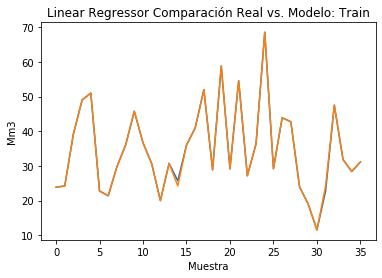

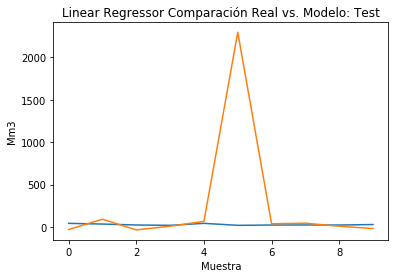

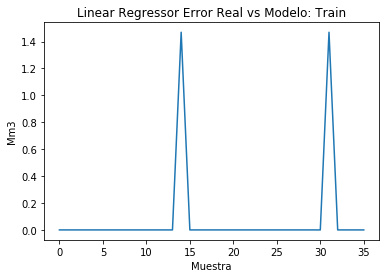

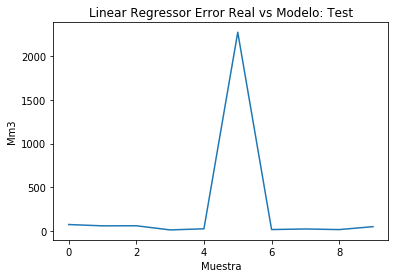

In [9]:
import matplotlib.pyplot as plt
x=list(range(len(target)))
x2=list(range(len(expected)))
plt.title("Linear Regressor Comparación Real vs. Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,target,x,_pred)
plt.savefig('linComp1.png')
plt.show()
plt.title("Linear Regressor Comparación Real vs. Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,expected,x2,_pred2)
plt.savefig('linComp2.png')
plt.show()
plt.title("Linear Regressor Error Real vs Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,abs(target-_pred))
plt.savefig('linComp3.png')
plt.show()
plt.title("Linear Regressor Error Real vs Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,abs(expected-_pred2))
plt.savefig('linComp4.png')
plt.show()

In [10]:
target=train['Label']
expected=test_['Label']
regr =linear_model.Ridge(alpha=0.05)

regr.fit(trdata, target)

# Make predictions using the testing set
_pred = regr.predict(trdata)
print(_pred)
print(list(target))
print('abs error')
print(list(target)-_pred)
print(mean_squared_error(target, _pred))
print(explained_variance_score(target, _pred))

[37.36425422 26.49979308 35.62083842 48.69421237 50.56118835 22.80210249
 21.97440242 33.12606202 36.40461388 45.04168022 32.93320046 32.52431718
 20.35485734 24.08001927 28.93026921 36.13808211 41.33497188 51.05518667
 29.32289729 45.80963697 28.56905903 46.223444   31.19685855 44.27729177
 68.13274367 33.85852427 27.44555939 42.82762571 25.23763082 23.95346761
 16.41646318 28.93026921 47.29798112 31.65944223 23.24986393 31.59317964]
[23.843000000000004, 24.2134, 39.276720000000005, 49.04623, 51.01856, 22.75771, 21.370179999999998, 29.772309999999997, 36.00458, 45.79233, 36.67633, 30.652140000000003, 19.97768, 30.751070000000002, 25.6956, 36.00458, 40.96053, 52.02555, 28.86409, 58.83784, 29.148640000000004, 54.60454, 27.15492, 36.395340000000004, 68.60216, 29.19626, 43.90293, 42.7587, 23.96598, 18.96363, 11.51707, 22.75771, 47.53508, 31.854979999999998, 28.39445, 31.14917]
abs error
[-13.52125422  -2.28639308   3.65588158   0.35201763   0.45737165
  -0.04439249  -0.60422242  -3.353752

In [11]:
_pred2 = regr.predict(tstdata)
print(_pred2)
print(list(expected))
print('abs error')
print(list(expected)-_pred2)
print(mean_squared_error(expected, _pred2))
print(explained_variance_score(expected, _pred2))

[39.45661803 39.12131307 31.83584097 28.95838046 37.66799181 35.70402813
 39.44561383 50.89888485 18.80228106 32.35668795]
[43.2011, 35.1229, 23.96598, 19.97768, 43.328109999999995, 20.01339, 23.67977, 24.33784, 23.67977, 29.435270000000003]
abs error
[  3.74448197  -3.99841307  -7.86986097  -8.98070046   5.66011819
 -15.69063813 -15.76584383 -26.56104485   4.87748894  -2.92141795]
143.7204724205747
-0.38350266055076987


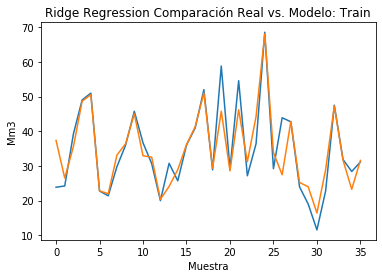

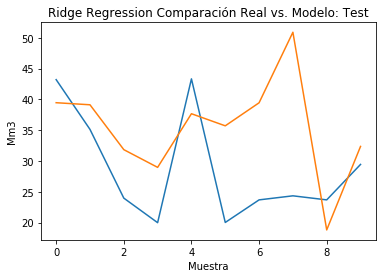

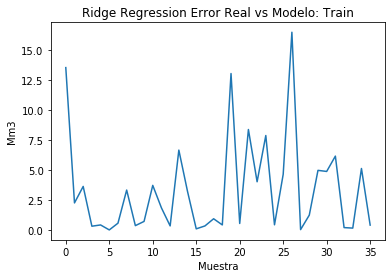

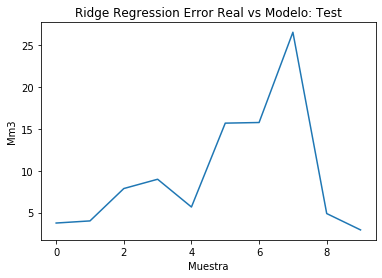

In [12]:
import matplotlib.pyplot as plt
x=list(range(len(target)))
x2=list(range(len(expected)))
plt.title("Ridge Regression Comparación Real vs. Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,target,x,_pred)
plt.savefig('ridgeComp1.png')
plt.show()
plt.title("Ridge Regression Comparación Real vs. Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,expected,x2,_pred2)
plt.savefig('ridgeComp2.png')
plt.show()
plt.title("Ridge Regression Error Real vs Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,abs(target-_pred))
plt.savefig('ridgeComp3.png')
plt.show()
plt.title("Ridge Regression Error Real vs Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,abs(expected-_pred2))
plt.savefig('ridgeComp4.png')
plt.show()

In [13]:
import pickle
filename = 'ridge2.sav'
pickle.dump(regr, open(filename, 'wb'))

In [14]:
target=train['Label']
expected=test_['Label']
regr = MLPRegressor(solver='adam',activation='relu',hidden_layer_sizes=(120,120),max_iter=7000)

regr.fit(trdata, target)

# Make predictions using the testing set

_pred = regr.predict(trdata)
print(_pred)
print(list(target))
print('abs error')
print(list(target)-_pred)
print(mean_squared_error(target, _pred))
print(explained_variance_score(target, _pred))

_pred2 = regr.predict(tstdata)
print(_pred2)
print(list(expected))
print('abs error')
print(list(expected)-_pred2)
print(mean_squared_error(expected, _pred2))
print(explained_variance_score(expected, _pred2))

[24.09708073 23.93308649 37.73054809 48.09741236 50.94952601 22.37859303
 20.93643123 33.20476885 35.37416928 44.9021991  33.03375281 30.68125349
 19.23929359 32.41726176 24.42512346 35.20858737 40.17769746 51.20377902
 28.29788052 58.69377816 28.72936752 54.64690319 27.49868041 35.9967884
 67.90636052 33.48132173 39.98560612 41.93512879 23.9137882  18.68469001
 11.53416891 24.42512346 47.00281348 30.56773187 27.8526507  30.64334136]
[23.843000000000004, 24.2134, 39.276720000000005, 49.04623, 51.01856, 22.75771, 21.370179999999998, 29.772309999999997, 36.00458, 45.79233, 36.67633, 30.652140000000003, 19.97768, 30.751070000000002, 25.6956, 36.00458, 40.96053, 52.02555, 28.86409, 58.83784, 29.148640000000004, 54.60454, 27.15492, 36.395340000000004, 68.60216, 29.19626, 43.90293, 42.7587, 23.96598, 18.96363, 11.51707, 22.75771, 47.53508, 31.854979999999998, 28.39445, 31.14917]
abs error
[-0.25408073  0.28031351  1.54617191  0.94881764  0.06903399  0.37911697
  0.43374877 -3.43245885  0.630

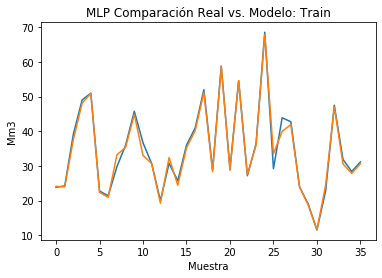

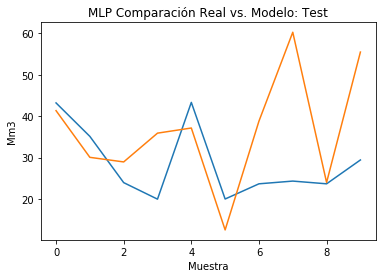

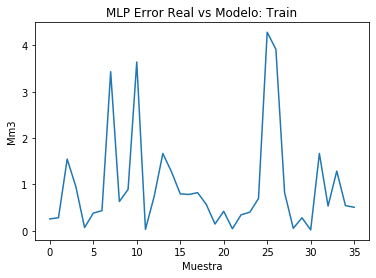

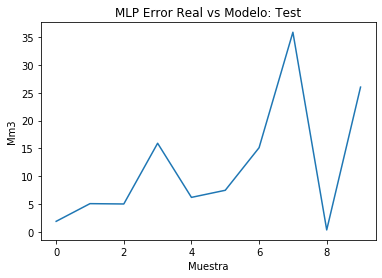

In [15]:
import matplotlib.pyplot as plt
x=list(range(len(target)))
x2=list(range(len(expected)))
plt.title("MLP Comparación Real vs. Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,target,x,_pred)
plt.savefig('Comp1.png')
plt.show()
plt.title("MLP Comparación Real vs. Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,expected,x2,_pred2)
plt.savefig('Comp2.png')
plt.show()
plt.title("MLP Error Real vs Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,abs(target-_pred))
plt.savefig('Comp3.png')
plt.show()
plt.title("MLP Error Real vs Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,abs(expected-_pred2))
plt.savefig('Comp4.png')
plt.show()

In [16]:
import pickle
filename = 'mlp2.sav'
pickle.dump(regr, open(filename, 'wb'))

In [17]:
target=train['Label']
expected=test_['Label']
regr = RandomForestRegressor(n_estimators = 300, max_depth =40)

regr=regr.fit(trdata, target)

# Make predictions using the testing set

_pred = regr.predict(trdata)
print(_pred)
print(list(target))
print('abs error')
print(list(target)-_pred)
print(mean_squared_error(target, _pred))
print(explained_variance_score(target, _pred))

_pred2 = regr.predict(tstdata)
print(_pred2)
print(list(expected))
print('abs error')
print(list(expected)-_pred2)
print(mean_squared_error(expected, _pred2))
print(explained_variance_score(expected, _pred2))

[28.56188198 26.20525493 39.9910661  47.4949347  41.08757496 27.40858474
 26.25321732 31.7444556  41.95093707 38.42540162 34.8726377  29.71294744
 27.36681427 31.16028763 25.35560536 37.1511221  39.38880034 45.27775343
 31.33530217 49.68397247 31.95870885 45.95608508 31.20803263 34.87298558
 59.36885769 29.31358461 37.79908599 40.00538463 26.71678337 23.93995146
 19.63035075 25.35560536 48.58876823 33.0035107  31.32921304 32.35121992]
[23.843000000000004, 24.2134, 39.276720000000005, 49.04623, 51.01856, 22.75771, 21.370179999999998, 29.772309999999997, 36.00458, 45.79233, 36.67633, 30.652140000000003, 19.97768, 30.751070000000002, 25.6956, 36.00458, 40.96053, 52.02555, 28.86409, 58.83784, 29.148640000000004, 54.60454, 27.15492, 36.395340000000004, 68.60216, 29.19626, 43.90293, 42.7587, 23.96598, 18.96363, 11.51707, 22.75771, 47.53508, 31.854979999999998, 28.39445, 31.14917]
abs error
[-4.71888198 -1.99185493 -0.7143461   1.5512953   9.93098504 -4.65087474
 -4.88303732 -1.9721456  -5.94

In [18]:
import pickle
filename = 'rf.sav'
pickle.dump(regr, open(filename, 'wb'))

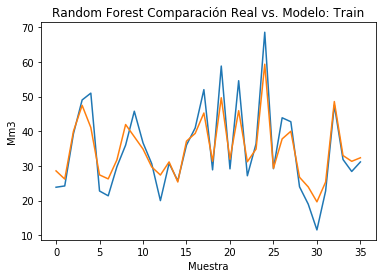

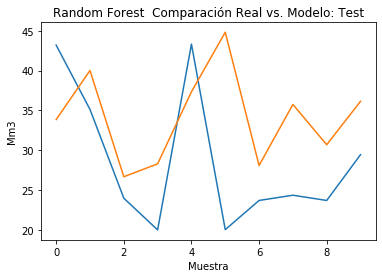

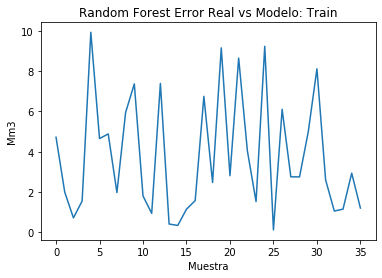

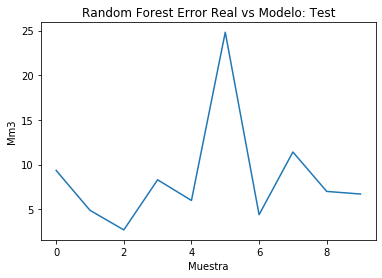

In [19]:
import matplotlib.pyplot as plt
x=list(range(len(target)))
x2=list(range(len(expected)))
plt.title("Random Forest Comparación Real vs. Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,target,x,_pred)
plt.savefig('rfComp1.png')
plt.show()
plt.title("Random Forest  Comparación Real vs. Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,expected,x2,_pred2)
plt.savefig('rfComp2.png')
plt.show()
plt.title("Random Forest Error Real vs Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,abs(target-_pred))
plt.savefig('rfComp3.png')
plt.show()
plt.title("Random Forest Error Real vs Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,abs(expected-_pred2))
plt.savefig('rfComp4.png')
plt.show()

In [20]:
target=train['Label']
expected=test_['Label']
regr =linear_model.Ridge(alpha=.5)

regr.fit(trdata, target)

rfe = RFE(regr, n_features_to_select=200)             
rfe = rfe.fit(trdata, target)

_pred = rfe.predict(trdata)
print(_pred)
print(list(target))
print('abs error')
print(list(target)-_pred)
print(mean_squared_error(target, _pred))
print(explained_variance_score(target, _pred))

_pred2 = rfe.predict(tstdata)
print(_pred2)
print(list(expected))
print('abs error')
print(list(expected)-_pred2)
print(mean_squared_error(expected, _pred2))
print(explained_variance_score(expected, _pred2))

[39.01620129 31.52510857 36.96872401 46.06607045 49.38590214 24.52840873
 25.32417329 33.34110879 39.03188826 41.06070941 33.25732814 32.23700987
 21.78727967 25.38284324 27.88768631 37.39471308 42.00934941 44.39771452
 31.79455228 41.67535237 26.2432344  39.67080287 32.49791841 38.94871699
 63.98539099 33.64410986 28.98323151 45.17770904 26.29679522 28.12644978
 20.34684323 27.88768631 45.65947329 31.26477738 25.35340508 33.28332181]
[23.843000000000004, 24.2134, 39.276720000000005, 49.04623, 51.01856, 22.75771, 21.370179999999998, 29.772309999999997, 36.00458, 45.79233, 36.67633, 30.652140000000003, 19.97768, 30.751070000000002, 25.6956, 36.00458, 40.96053, 52.02555, 28.86409, 58.83784, 29.148640000000004, 54.60454, 27.15492, 36.395340000000004, 68.60216, 29.19626, 43.90293, 42.7587, 23.96598, 18.96363, 11.51707, 22.75771, 47.53508, 31.854979999999998, 28.39445, 31.14917]
abs error
[-15.17320129  -7.31170857   2.30799599   2.98015955   1.63265786
  -1.77069873  -3.95399329  -3.568798

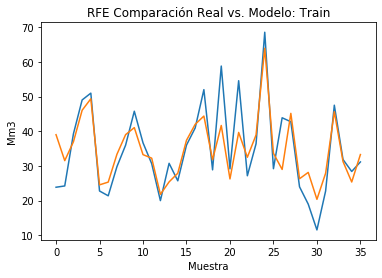

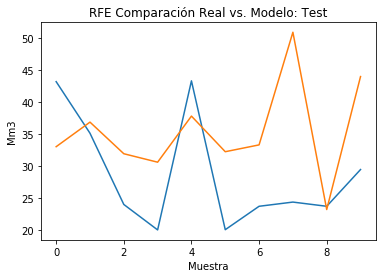

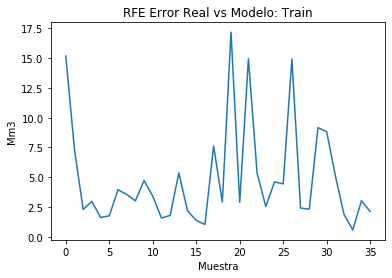

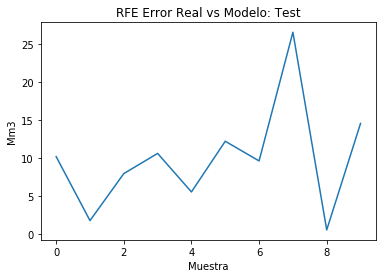

In [21]:
import matplotlib.pyplot as plt
x=list(range(len(target)))
x2=list(range(len(expected)))
plt.title("RFE Comparación Real vs. Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,target,x,_pred)
plt.savefig('rfeComp1.png')
plt.show()
plt.title("RFE Comparación Real vs. Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,expected,x2,_pred2)
plt.savefig('rfeComp2.png')
plt.show()
plt.title("RFE Error Real vs Modelo: Train")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x,abs(target-_pred))
plt.savefig('rfeComp3.png')
plt.show()
plt.title("RFE Error Real vs Modelo: Test")
plt.ylabel("Mm3")
plt.xlabel("Muestra")
plt.plot(x2,abs(expected-_pred2))
plt.savefig('rfeComp4.png')
plt.show()

In [22]:
import pickle
filename = 'rfe.sav'
pickle.dump(rfe, open(filename, 'wb'))

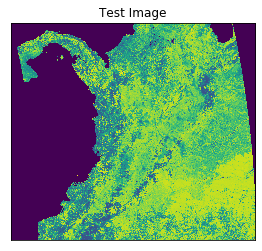

(4513, 5070)


In [23]:
# to open a tiff file for reading:
tif2 = TIFF.open('MOD13Q1.A2019113.h10v08.006.2019129235727_NDVI.tiff', mode='r')
# to read all images in a TIFF file:
for image in tif2.iter_images(): # do stuff with image
    
    ret2,th2 = cv2.threshold(image,20,255,cv2.THRESH_BINARY_INV)
    #ret2,th2 = cv2.threshold(image[:,:,0],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    plt.imshow(image)
    plt.title('Test Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    print(image.shape)
    



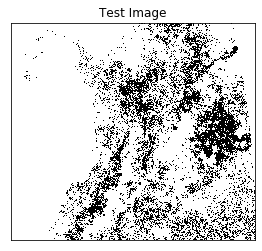

(2257, 2535)
[[3276.6 3276.6 3276.6 ... 3276.7 3276.7 3276.7]
 [3276.6 3276.6 3276.6 ... 3276.7 3276.7 3276.7]
 [3276.7 3276.6 3276.6 ... 3276.7 3276.7 3276.7]
 ...
 [3276.7 3276.7 3276.7 ... 3276.5   16.8   19.8]
 [3276.7 3276.7 3276.7 ...   24.    18.  3276.5]
 [3276.7 3276.7 3276.7 ... 3276.5 3276.5   18.2]]


In [24]:
# to open a tiff file for reading:
tif2 = TIFF.open('MOD16A2.A2019137.h10v08.006.2019152232212_ET0.tiff', mode='r')
# to read all images in a TIFF file:
for image in tif2.iter_images(): # do stuff with image
    
    ret2,th2 = cv2.threshold(image,20,255,cv2.THRESH_BINARY_INV)
    #ret2,th2 = cv2.threshold(image[:,:,0],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    plt.imshow(image*0.1,cmap='gray')
    plt.title('Test Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    print(image.shape)
    
print(image*0.1)


1. Contexto
2. Recolecci{on de datos
3. Preprocesamiento
4. Construcción del dataset
5. Ajuste de los métodos
6. Pruebas de Desempeño
7. Resultados